In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import plotly.express as px

In [73]:
df = pd.read_csv("netflix_titles_nov_2019.csv")

In [74]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


# Content Distribution On Netflix

In [75]:
type_dict = dict(df['type'].value_counts())

In [76]:
print(type_dict.keys())
print(type_dict.values())

dict_keys(['Movie', 'TV Show'])
dict_values([3939, 1898])


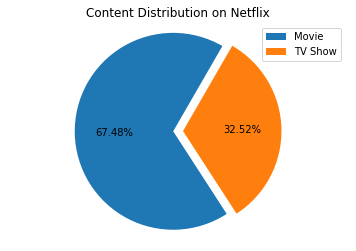

In [77]:
plt.pie(type_dict.values(),startangle=60,autopct="%1.2f%%",explode=[0,0.1])
plt.title("Content Distribution on Netflix")
plt.legend(type_dict.keys())
plt.axis('equal')
plt.show()

# Countries with most content on Netflix

In [78]:
country_dict = dict(df['country'].value_counts()[:10][::-1])

In [79]:
country_dict.values()

dict_values([78, 80, 85, 113, 133, 139, 168, 336, 697, 1907])

In [80]:
country_dict.keys()

dict_keys(['Turkey', 'Mexico', 'France', 'Spain', 'South Korea', 'Canada', 'Japan', 'United Kingdom', 'India', 'United States'])

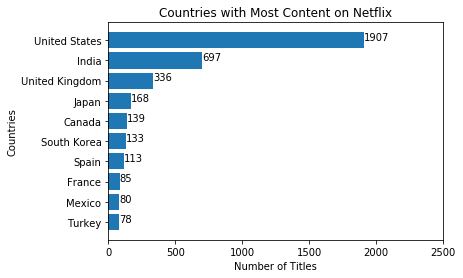

In [81]:
plt.barh(list(country_dict.keys()),list(country_dict.values()))
#plt.text(1000,'India','Mera Bharat')
for i,j in zip(list(country_dict.keys()),list(country_dict.values())):
    plt.text(j,i,str(j))
plt.xlim(0,2500)
plt.xlabel('Number of Titles')
plt.ylabel('Countries')
plt.title("Countries with Most Content on Netflix")
plt.show()

# First 10 Movies and TV Shows added

In [82]:
df_time = df.dropna(subset=['date_added'],axis=0)

In [83]:
df_time['date_added'] = df_time['date_added'].astype(np.datetime64)

In [84]:
Movie_df_time = df_time[df_time['type']=='Movie']

In [85]:
TVShow_df_time = df_time[df_time['type']=='TV Show']

In [86]:
Movie_df_time=Movie_df_time.sort_values('date_added')

In [87]:
TVShow_df_time = TVShow_df_time.sort_values('date_added')

In [88]:
Movie_df_time.reset_index(inplace=True)

In [89]:
TVShow_df_time.reset_index(inplace=True)

In [90]:
first_movies_list=[]

In [91]:
first_movies_date=[]

In [92]:
for i in range(10):
    first_movies_list.append(Movie_df_time['title'][i])
    first_movies_date.append(Movie_df_time['date_added'][i])

In [93]:
print("First 10 Movies Added on NETFLIX")
print()
for i in first_movies_list:
    print(i)

First 10 Movies Added on NETFLIX

To and From New York
Just Another Love Story
Splatter
Mad Ron's Prevues from Hell
Even the Rain
Joseph: King of Dreams
Unspeakable Acts
A Stoning in Fulham County
Adam: His Song Continues
Hard Lessons


In [94]:
first_movies_date

[Timestamp('2008-01-01 00:00:00'),
 Timestamp('2009-05-05 00:00:00'),
 Timestamp('2009-11-18 00:00:00'),
 Timestamp('2010-11-01 00:00:00'),
 Timestamp('2011-05-17 00:00:00'),
 Timestamp('2011-09-27 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00'),
 Timestamp('2011-10-01 00:00:00')]

In [95]:
first_tvshow_list=[]
first_tvshow_date=[]

In [96]:
for i in range(10):
    first_tvshow_list.append(TVShow_df_time['title'][i])
    first_tvshow_date.append(TVShow_df_time['date_added'][i])

In [97]:
print("First 10 TV Shows ADDED on NETFLIX")
print()
for i in first_tvshow_list:
    print(i)

First 10 TV Shows ADDED on NETFLIX

Dinner for Five
DreamWorks How to Train Your Dragon Legends
DreamWorks Shrek's Swamp Stories
DreamWorks Spooky Stories: Volume 2
Jack Taylor
DreamWorks Happy Holidays from Madagascar
Russell Peters vs. the World
Oscar's Oasis
Residue
Star-Crossed


In [98]:
df_movies = df[df['type']=='Movie']

In [115]:
df_tvshow = df[df['type']=='TV Show']

In [100]:
df_movies.reset_index(inplace=True)

In [116]:
df_tvshow.reset_index(inplace=True)

In [102]:
for i in range(3939):
    df_movies['duration'][i] = int(df_movies['duration'][i][:-3])

In [106]:
df_movies.sort_values('duration',inplace=True)

In [107]:
df_movies.head(2)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
740,1185,70304298,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,"June 4, 2019",2014,TV-Y7,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",Movie
402,634,81176188,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",NaN,"September 5, 2019",2019,TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...,Movie


In [108]:
df_movies.tail(3)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1715,2651,70090035,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,TV-14,214,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",Movie
2717,4009,60020906,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"December 8, 2017",2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",Movie
1394,2160,80988062,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",Movie


In [117]:
for i in range(1898):
    df_tvshow['duration'][i] = int(df_tvshow['duration'][i][:-7])

In [120]:
df_tvshow.sort_values('duration',inplace=True)

In [121]:
df_tvshow.tail(3)

,index,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
513,1371,70143825,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,NaN,2019,TV-14,14,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",TV Show
421,1109,70140391,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,NaN,2018,TV-14,15,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,TV Show
1065,3160,70142386,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,NaN,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,TV Show


In [124]:
Movie_df_time[Movie_df_time['date_added']<'2016-01-01'].count()

index           104
show_id         104
title           104
director        101
cast             91
country         100
date_added      104
release_year    104
rating          102
duration        104
listed_in       104
description     104
type            104
dtype: int64

In [137]:
Movie_df_time[(Movie_df_time['date_added']<'2017-01-01') & (Movie_df_time['date_added']>='2016-01-01')].count()

index           264
show_id         264
title           264
director        245
cast            226
country         254
date_added      264
release_year    264
rating          262
duration        264
listed_in       264
description     264
type            264
dtype: int64

In [138]:
Movie_df_time[(Movie_df_time['date_added']<'2018-01-01') & (Movie_df_time['date_added']>='2017-01-01')].count()

index           913
show_id         913
title           913
director        897
cast            802
country         892
date_added      913
release_year    913
rating          910
duration        913
listed_in       913
description     913
type            913
dtype: int64

In [139]:
Movie_df_time[(Movie_df_time['date_added']<'2019-01-01') & (Movie_df_time['date_added']>='2018-01-01')].count()

index           1290
show_id         1290
title           1290
director        1240
cast            1193
country         1234
date_added      1290
release_year    1290
rating          1290
duration        1290
listed_in       1290
description     1290
type            1290
dtype: int64

In [140]:
Movie_df_time[(Movie_df_time['date_added']<'2020-01-01') & (Movie_df_time['date_added']>='2019-01-01')].count()

index           1367
show_id         1367
title           1367
director        1331
cast            1272
country         1289
date_added      1367
release_year    1367
rating          1367
duration        1367
listed_in       1367
description     1367
type            1367
dtype: int64

In [142]:
TVShow_df_time[TVShow_df_time['date_added']<'2016-01-01'].count()

index           23
show_id         23
title           23
director         3
cast            20
country         22
date_added      23
release_year    23
rating          23
duration        23
listed_in       23
description     23
type            23
dtype: int64

In [143]:
TVShow_df_time[(TVShow_df_time['date_added']<'2017-01-01') & (TVShow_df_time['date_added']>='2016-01-01') ].count()

index           148
show_id         148
title           148
director          6
cast            135
country         142
date_added      148
release_year    148
rating          147
duration        148
listed_in       148
description     148
type            148
dtype: int64

In [144]:
TVShow_df_time[(TVShow_df_time['date_added']<'2018-01-01') & (TVShow_df_time['date_added']>='2017-01-01') ].count()

index           271
show_id         271
title           271
director         25
cast            242
country         219
date_added      271
release_year    271
rating          271
duration        271
listed_in       271
description     271
type            271
dtype: int64

In [145]:
TVShow_df_time[(TVShow_df_time['date_added']<'2019-01-01') & (TVShow_df_time['date_added']>='2018-01-01') ].count()

index           339
show_id         339
title           339
director         23
cast            284
country         265
date_added      339
release_year    339
rating          338
duration        339
listed_in       339
description     339
type            339
dtype: int64

In [146]:
TVShow_df_time[(TVShow_df_time['date_added']<'2020-01-01') & (TVShow_df_time['date_added']>='2019-01-01') ].count()

index           476
show_id         476
title           476
director         30
cast            419
country         382
date_added      476
release_year    476
rating          476
duration        476
listed_in       476
description     476
type            476
dtype: int64

In [150]:
df['listed_in'].value_counts()

Documentaries                                                             297
Stand-Up Comedy                                                           265
Dramas, International Movies                                              238
Dramas, Independent Movies, International Movies                          170
Comedies, Dramas, International Movies                                    157
Kids' TV                                                                  153
Documentaries, International Movies                                       147
Children & Family Movies                                                  115
Comedies, International Movies                                            113
Children & Family Movies, Comedies                                        110
Action & Adventure, Dramas, International Movies                           96
Dramas, International Movies, Romantic Movies                              95
Crime TV Shows, International TV Shows, TV Dramas               

In [161]:
df['listed_in'][0]

'International TV Shows, Korean TV Shows, Romantic TV Shows'

In [166]:
dummies = df['listed_in'].str.get_dummies(sep=', ')

In [168]:
df_listedin = pd.concat([df,dummies],axis=1)

In [189]:
dummies_list = list(dummies.columns)

In [187]:
df_listedin[df_listedin['Action & Adventure']==1]['show_id'].count()

532

In [191]:
listed_in_count = []

In [192]:
for i in dummies_list:
    x = df_listedin[df_listedin[i]==1]['show_id'].count()
    listed_in_count.append(x)


In [193]:
dummies_list

['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [194]:
listed_in_count

[532,
 41,
 111,
 205,
 340,
 24,
 65,
 992,
 355,
 42,
 658,
 271,
 1488,
 46,
 229,
 516,
 1797,
 966,
 313,
 120,
 59,
 55,
 229,
 146,
 338,
 265,
 165,
 66,
 114,
 149,
 273,
 42,
 122,
 425,
 574,
 51,
 66,
 66,
 10,
 43,
 41,
 353]

In [195]:
len(dummies_list)

42